In [1]:
using Plots
using DifferentialEquations

M01 = 6.7
M02 = 5.9

p_cr = 35 #критическая стоимость продукта
tau1 = 17 #длительность производственного цикла фирмы 1
p1 = 10.5 #себестоимость продукта у фирмы 1
tau2 = 21 #длительность производственного цикла фирмы 2
p2 = 8.6 #себестоимость продукта у фирмы 2
N = 25 #число потребителей производимого продукта
q = 1 #максимальная потребность одного человека в продукте в единицу времени

a1 = p_cr / (tau1 * tau1 * p1 * p1 * N * q)
a2 = p_cr / (tau2 * tau2 * p2 * p2 * N *q)
b = p_cr / (tau1 * tau1 * tau2 * tau2 * p1 * p1 * p2 * p2 * N * q)
c1 = (p_cr - p1) / (tau1 * p1)
c2 = (p_cr - p2) / (tau2 * p2)

function F(du, u, p, t)
    M1, M2, M3, M4 = u
    du[1] = u[1] - b / c1*u[1] * u[2] - a1 / c1*u[1] * u[1]
    du[2] = c2 / c1*u[2] - b / c1*u[1] * u[2] - a2 / c1*u[2] * u[2]
    du[3] = u[3] - (b / c1 + 0.00066)*u[3] * u[4] - a1 / c1*u[3] * u[3]
    du[4] = c2 / c1*u[4] - b / c1*u[3] * u[4] - a2 / c1*u[4] * u[4]
end

prob1 = ODEProblem(F, [M01, M02, M01, M02], (0.0, 30.0))

sol1 = solve(prob1, dtmax=0.01)

M11 = [u[1] for u in sol1.u]
M12 = [u[2] for u in sol1.u]
M21 = [u[3] for u in sol1.u]
M22 = [u[4] for u in sol1.u]

3001-element Vector{Float64}:
    5.9
    5.963061445393012
    6.026795720601256
    6.091209978658187
    6.1563114480912535
    6.222107433706807
    6.288605317382904
    6.355812558870102
    6.423736696600296
    6.492385348503684
    6.561766212833949
    6.631887069001706
    6.702755778416316
    ⋮
 3405.599999970641
 3405.599999970952
 3405.59999997126
 3405.599999971564
 3405.599999971865
 3405.599999972163
 3405.599999972458
 3405.59999997275
 3405.599999973039
 3405.5999999733244
 3405.599999973607
 3405.5999999738865

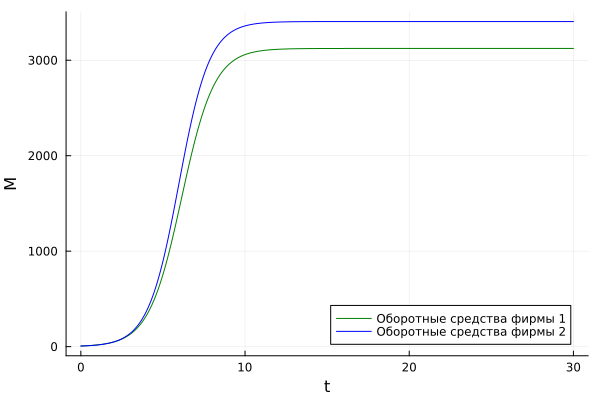

In [2]:
plt1 = plot(
  dpi=300,
  legend=:bottomright)

plot!(
  plt1,
  sol1.t,
  M11,
  label="Оборотные средства фирмы 1",
  xlabel="t",
  ylabel="M",
  color=:green)

plot!(
  plt1,
  sol1.t,
  M12,
  label="Оборотные средства фирмы 2",
  color=:blue)

plt1

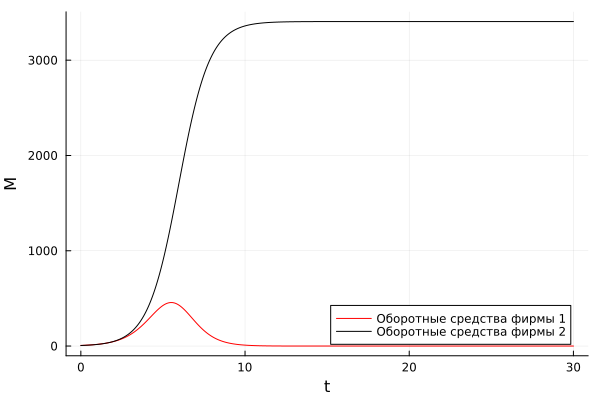

In [3]:
plt2 = plot(
  dpi=300,
  legend=:bottomright)

plot!(
  plt2,
  sol1.t,
  M21,
  label="Оборотные средства фирмы 1",
  xlabel="t",
  ylabel="M",
  color=:red)

plot!(
  plt2,
  sol1.t,
  M22,
  label="Оборотные средства фирмы 2",
  color=:black)

plt2